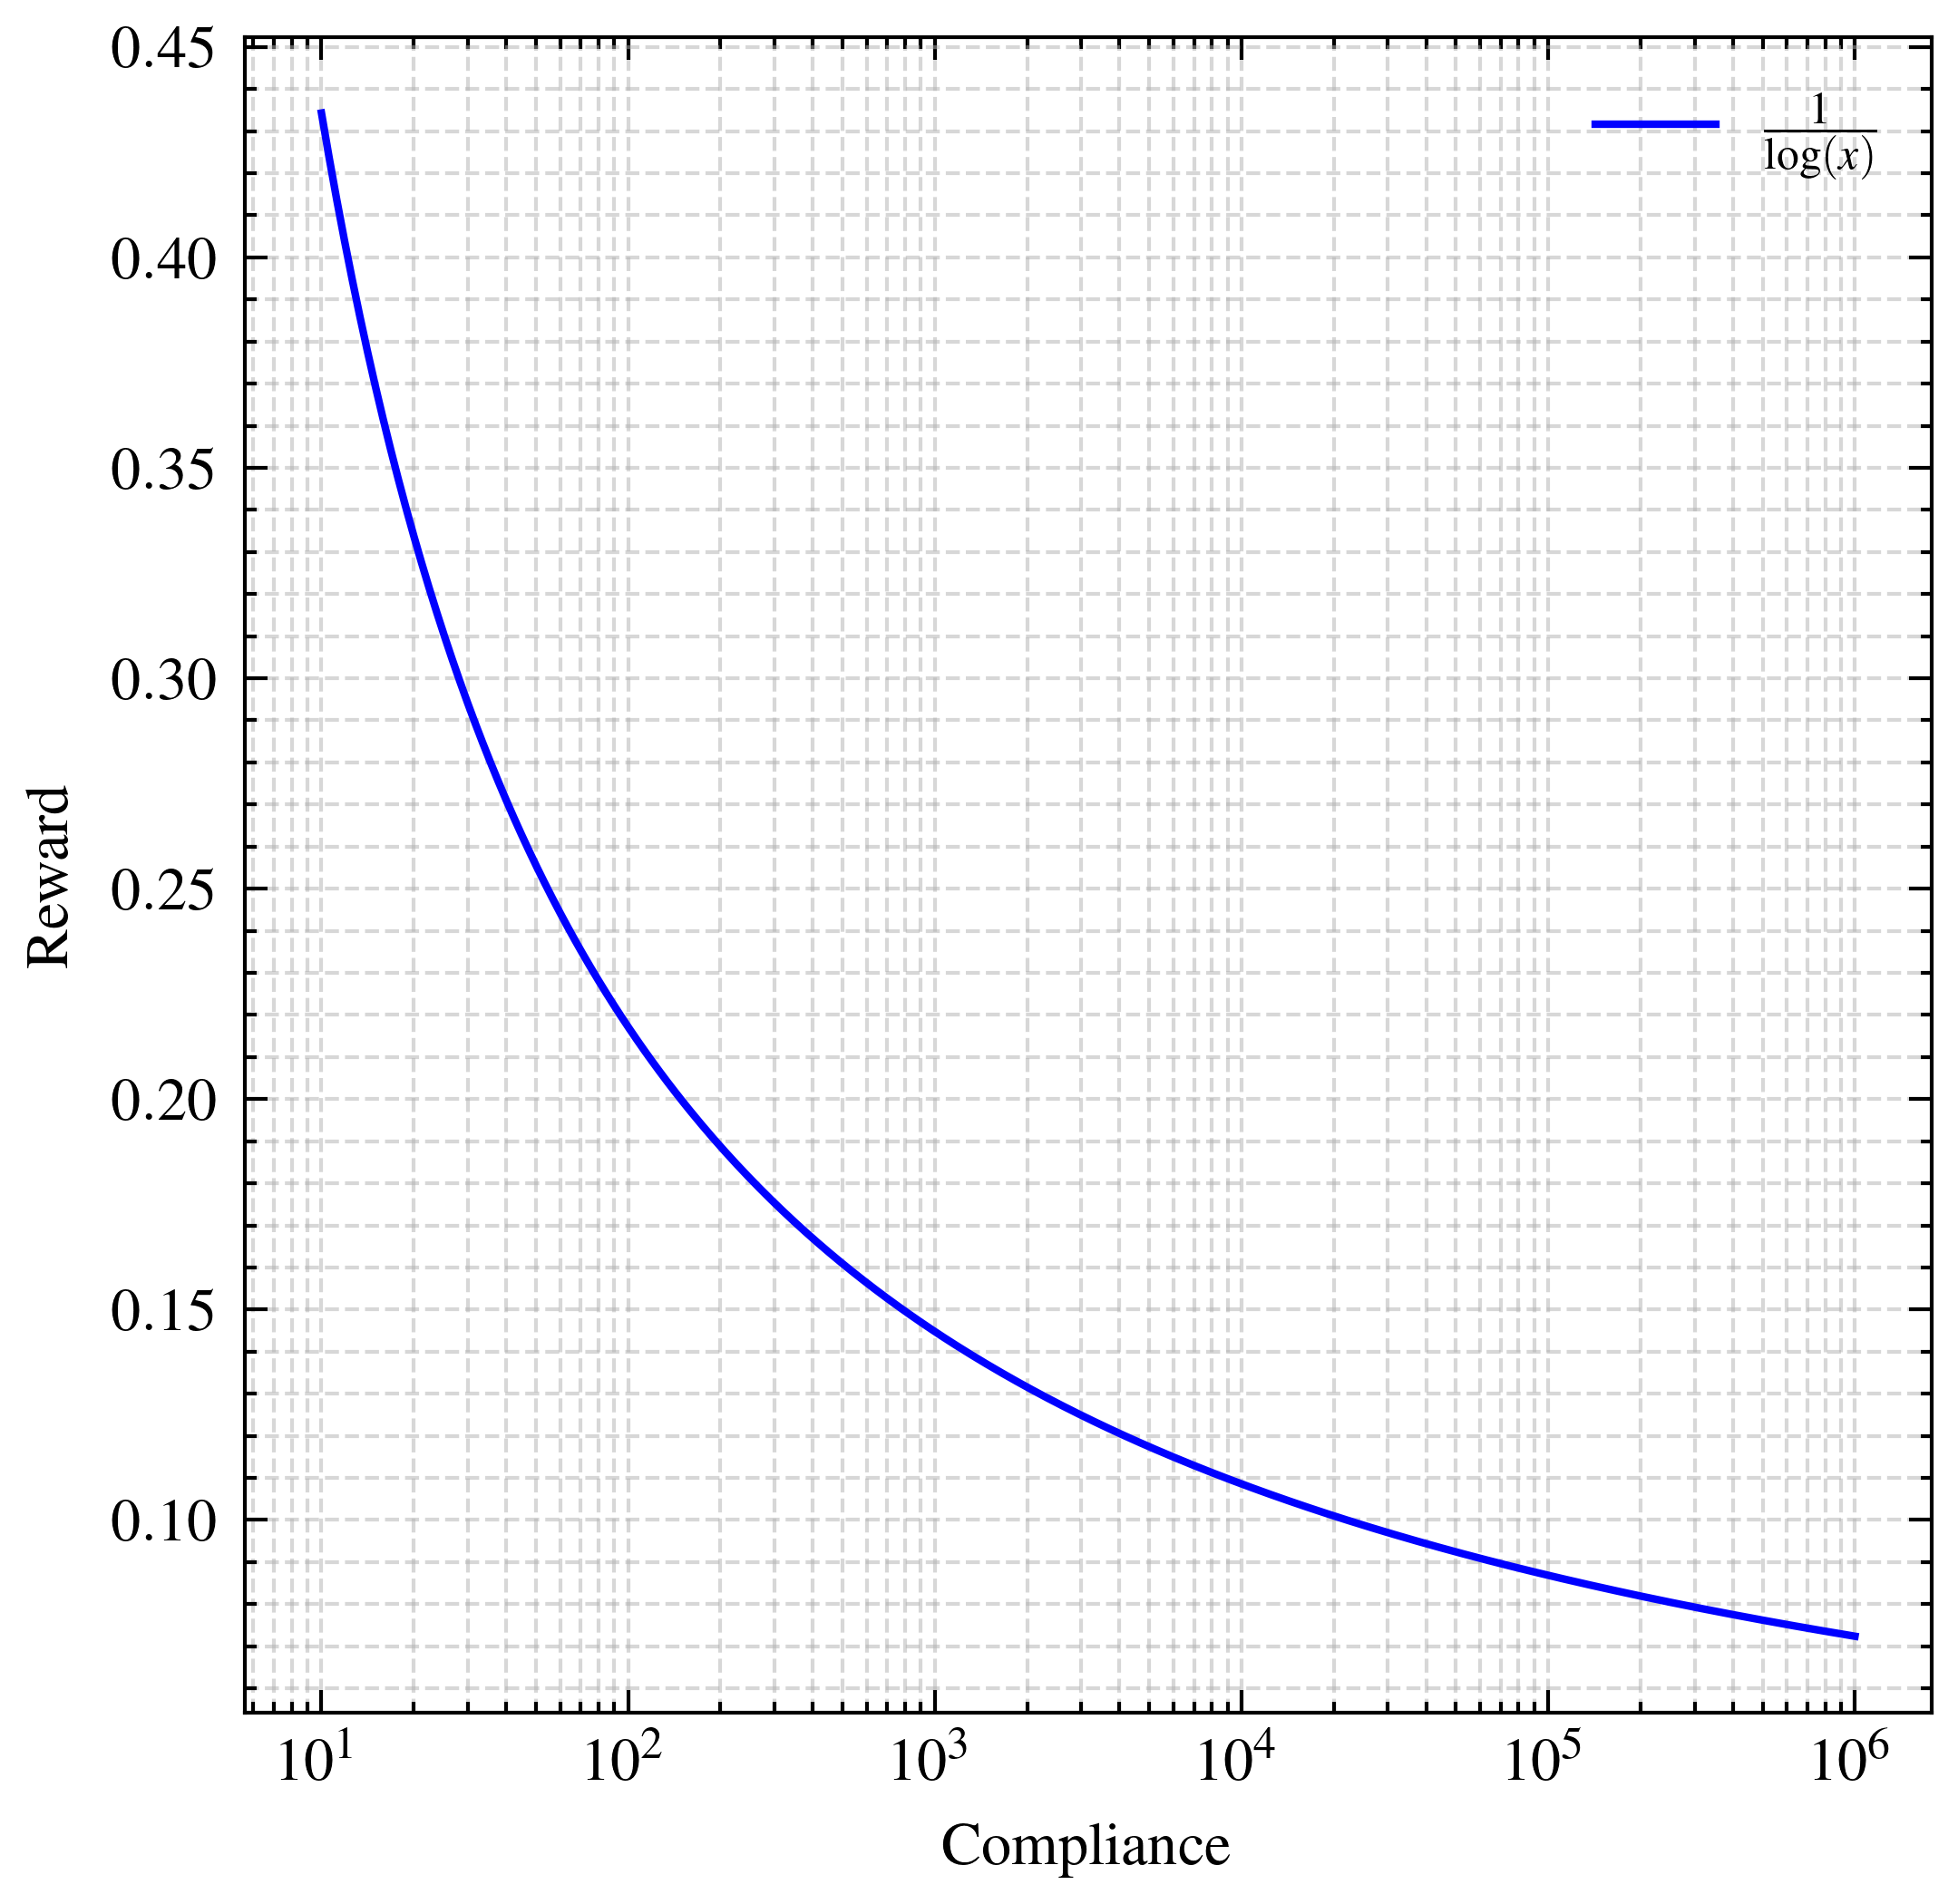

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','ieee'])

# Generating x values from 10 to 1,000,000
x_values = np.logspace(1, 6, num=400)
# Calculating the function 1/log(x)
y_values = 1 / np.log(x_values)

# Creating the plot
plt.figure(figsize=(4, 4))
plt.plot(x_values, y_values, label=r'$\frac{1}{\log(x)}$', color='blue')
plt.xscale('log')
plt.xlabel('Compliance')
plt.ylabel('Reward')
#plt.title('Plot of $y = 1/\\log(x)$')
plt.grid(True, which="both", ls="--",alpha=0.5)
plt.legend()
plt.savefig('log_plot.png', dpi=300)  # Specify the filename and DPI here
plt.show()


In [ ]:
# Let's test the environment using the check_env util from SB3:
observation_type = 'topopt_game'
train_env = sogym(mode='train',observation_type=observation_type,vol_constraint_type='hard',resolution=50,check_connectivity = True)
import matplotlib.pyplot as plt

reward = 0.0
while reward == 0.0:
    obs, info = train_env.reset()
    dones = False
    while not dones:
        action = train_env.action_space.sample()
        obs, reward, dones, truncated, info = train_env.step(action)

    fig = train_env.plot()
fig.savefig('env_test.png')

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
import matplotlib
import scienceplots

plt.style.use(['science', 'ieee'])

fig = plt.figure(figsize=(8, 8))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)

x = np.moveaxis(obs['image'], 0, -1)
ax1.imshow(x)
ax1.set_title("Current design image")
ax1.grid(False)
ax1.axis('off')
ax1.patch.set_edgecolor('black')
ax1.patch.set_linewidth('2')

x = np.moveaxis(obs['structure_strain_energy'], 0, -1)
norm = Normalize(vmin=0, vmax=1)

im2 = ax2.imshow(x, cmap='jet', norm=norm)
ax2.set_title("Normalized strain energy")
ax2.grid(False)
ax2.axis('off')

cbar = fig.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
cbar.set_label('Strain Energy')

design_variables = obs['design_variables'].tolist()
n_steps_left = obs['n_steps_left'].item()
volume = obs['volume'].item()
beta = obs['beta'].tolist()
score = obs['score'].item()

def format_list(numbers, wrap_at=10):
    # Initialize parts and the current line
    parts = []
    current_line = []

    # Iterate through numbers and collect lines of specified length
    for num in numbers:
        current_line.append(f"{num:.2f}")
        if len(current_line) == wrap_at:
            parts.append(", ".join(current_line))
            current_line = []

    # Add remaining items if any
    if current_line:
        parts.append(", ".join(current_line))

    # Format the entire list with a single bracket pair
    if parts:
        wrapped_vector = "[" + parts[0]
        if len(parts) > 1:
            wrapped_vector += ",\n " + ",\n ".join(parts[1:])
        wrapped_vector += "]"
    else:
        wrapped_vector = "[]"

    return wrapped_vector

# Example use within the matplotlib script
table_data = [
    ["Design Variables", format_list(design_variables)],
    ["Steps Left", f"{n_steps_left:.0f}"],
    ["Volume", f"{volume:.2f}"],
    ["Beta", format_list(beta)],
    ["Score", f"{score:.2f}"]
]

# The rest of the matplotlib code would be unchanged


table_data = [
    ["Design Variables", format_list(design_variables)],
    ["Steps Left", f"{n_steps_left:.0f}"],
    ["Volume", f"{volume:.2f}"],
    ["Beta", format_list(beta)],
    ["Score", f"{score:.2f}"]
]

table_ax = fig.add_subplot(2, 1, 2)
table_ax.axis('off')
table = table_ax.table(cellText=table_data, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)

default_height = 0.05
increased_height = 0.2
for (row_index, col_index), cell in table.get_celld().items():
    if row_index == 0 or row_index == 3:
        cell.set_height(increased_height)
    else:
        cell.set_height(default_height)
default_width = 0.6

for (row_index, col_index), cell in table.get_celld().items():
    if col_index == 0:
        cell.set_width(0.2)
    if col_index == 1:
        cell.set_width(default_width)

for (row_index, col_index), cell in table.get_celld().items():
    if col_index == 0:
        cell.get_text().set_weight('bold')

fig.subplots_adjust(hspace=0.0001, top=0.9, bottom=0.0, left=0.05, right=0.95)

plt.savefig('topopt_observation_space.png', dpi=300)
plt.show()


In [1]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.python.summary.summary_iterator import summary_iterator

def tensorboard_to_dataframe(path):
    # Check if the TensorBoard log file exists
    if not os.path.exists(path):
        raise FileNotFoundError(f"The specified file does not exist: {path}")
    
    # Initialize a list to store each entry as a dictionary
    data = []

    # Read data from the TensorBoard event file
    for e in summary_iterator(path):
        for v in e.summary.value:
            entry = {"wall_time": e.wall_time, "step": e.step, "tag": v.tag}
            # Check each possible field and add them if they are available
            if v.HasField('simple_value'):
                entry['simple_value'] = v.simple_value
            if v.HasField('image'):
                entry['image'] = True  # Indicate that image data is available
            if v.HasField('histo'):
                entry['histogram'] = True  # Indicate that histogram data is available
            if v.HasField('audio'):
                entry['audio'] = True  # Indicate that audio data is available
            if v.HasField('tensor'):
                entry['tensor'] = True  # Indicate that tensor data is available
            
            data.append(entry)
    
    # Convert the list of dictionaries to a DataFrame
    df = pd.DataFrame(data)

    # Handle cases where the DataFrame might be empty
    if df.empty:
        print("No data found in the file.")
    else:
        print("Data extraction complete.")
    
    return df

# Specify the path to your TensorBoard log file
log_file_path = "/home/thomas/Documents/scratch_thomas/GitHub/sogym_v2/tb_logs/imitation/events.out.tfevents.1713459083.holodeck.2191028.1"

# Convert the TensorBoard log file to a DataFrame
df = tensorboard_to_dataframe(log_file_path)

# Display the first few rows of the DataFrame
print(df.head())


2024-04-19 17:49:46.095613: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-19 17:49:46.609662: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /local/cuda-11.3/lib64:/local/TensorRT-7.2.2.3/lib
2024-04-19 17:49:46.609797: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvrtc.so.11.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /local/cuda-11.3/lib64:/local/TensorRT-7.2.2.3/lib
2024-04-19 17:49:46.609803: W tensor

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
Data extraction complete.
      wall_time  step         tag  simple_value
0  1.713459e+09     1  Loss/train      1.377432
1  1.713459e+09     1   Grad Norm      0.999999
2  1.713459e+09     1   Loss/test      1.099303
3  1.713459e+09     1    MAE/test      0.830923
4  1.713459e+09     2  Loss/train      0.884438


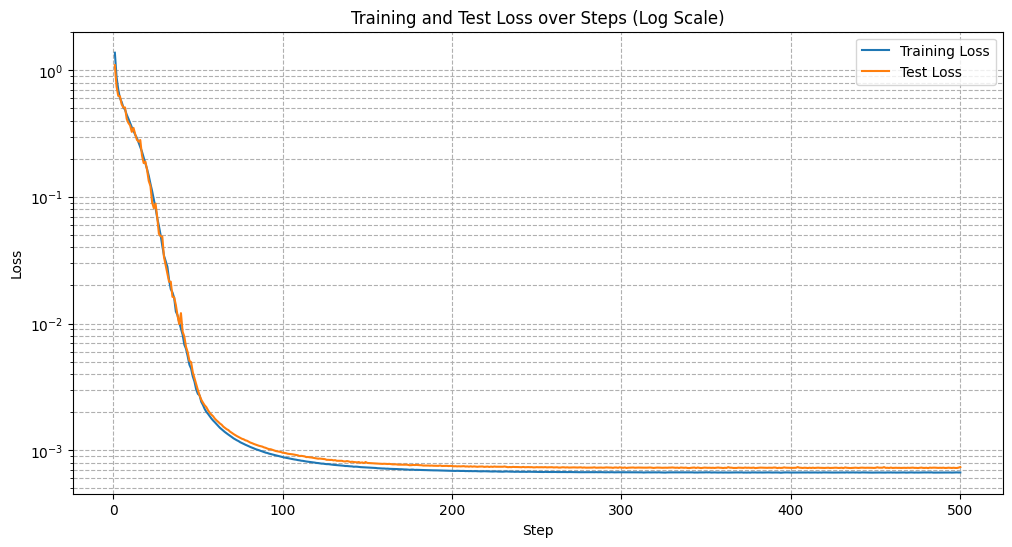

In [3]:
import matplotlib.pyplot as plt

# Filter data for Loss/train and Loss/test
loss_train = df[df['tag'] == 'Loss/train']
loss_test = df[df['tag'] == 'Loss/test']

# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(loss_train['step'], loss_train['simple_value'], label='Training Loss')
plt.plot(loss_test['step'], loss_test['simple_value'], label='Test Loss')

# Adding plot title and labels
plt.title('Training and Test Loss over Steps (Log Scale)')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.legend()

# Set y-axis to logarithmic scale
plt.yscale('log')

# Display grid
plt.grid(True, which="both", ls="--")  # grid lines for log scale

# Show the plot
plt.show()


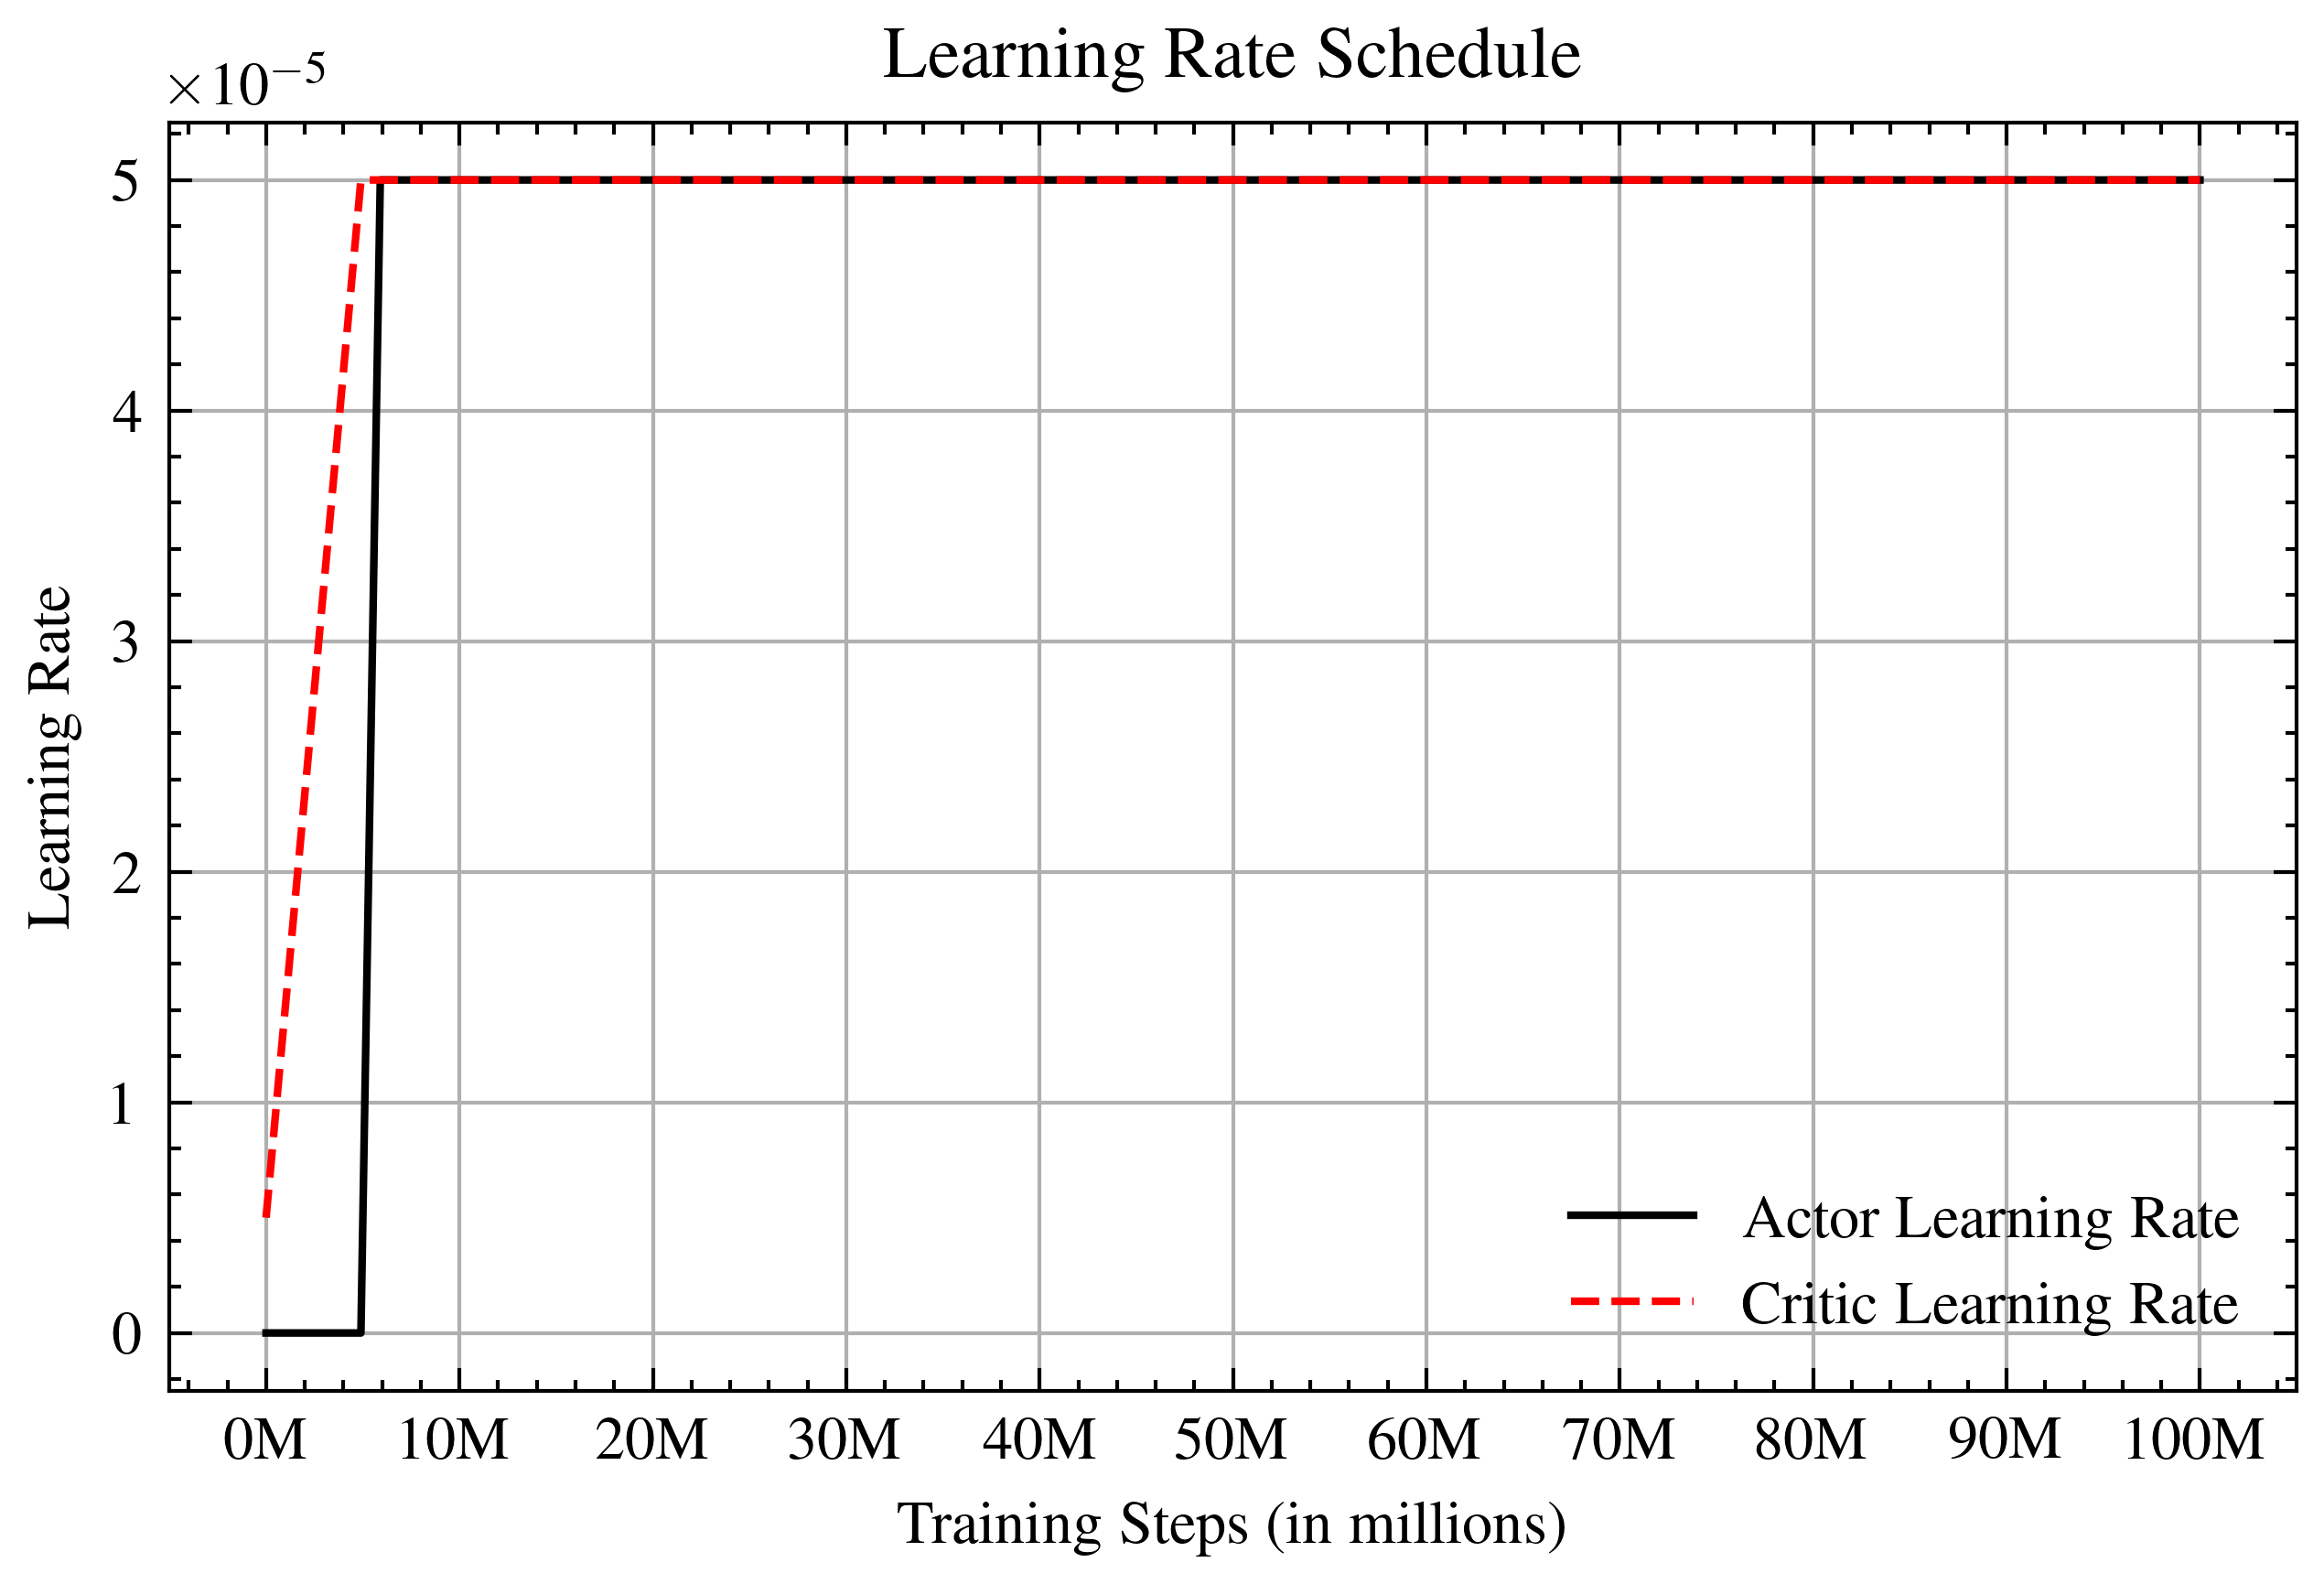

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Set plot size:
# Define the range of steps, reducing the density of points for visualization
steps = np.linspace(0, 100_000_000, num=1000, endpoint=True)

# Initialize learning rates for actor and critic
actor_lr = np.zeros_like(steps)
critic_lr = np.zeros_like(steps)

# Define key transition points
step_5M = np.searchsorted(steps, 5_000_000)
step_6M = np.searchsorted(steps, 6_000_000)

# Set learning rates
# Critic learning rate for first 5M steps, ramped linearly
critic_lr[:step_5M] = np.linspace(5e-6, 5e-5, step_5M)

# Actor learning rate remains at 0.0 up to 5M steps
# From 5M to 6M steps, increase both actor and critic learning rates linearly from 5e-6 to 5e-5
actor_lr[step_5M:step_6M] = np.linspace(5e-6, 5e-5, step_6M - step_5M)
critic_lr[step_5M:step_6M] = np.linspace(5e-5, 5e-5, step_6M - step_5M)

# From 6M steps onwards, maintain the maximum learning rate achieved
actor_lr[step_6M:] = 5e-5
critic_lr[step_6M:] = 5e-5

# Plot the learning rates
plt.figure(figsize=(5, 3))
plt.plot(steps, actor_lr, label='Actor Learning Rate')
plt.plot(steps, critic_lr, label='Critic Learning Rate', linestyle='--')
plt.xlabel('Training Steps (in millions)')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.legend()

# Set x-axis to display in millions
plt.xticks(np.linspace(0, 100_000_000, 11), [f"{x}M" for x in range(0, 101, 10)])
# plt.xscale('log')  # Logarithmic scale for better visualization
plt.grid(True)
plt.savefig('learning_rate_schedule.png', dpi=300)

plt.show()
#Save as 300 dpi


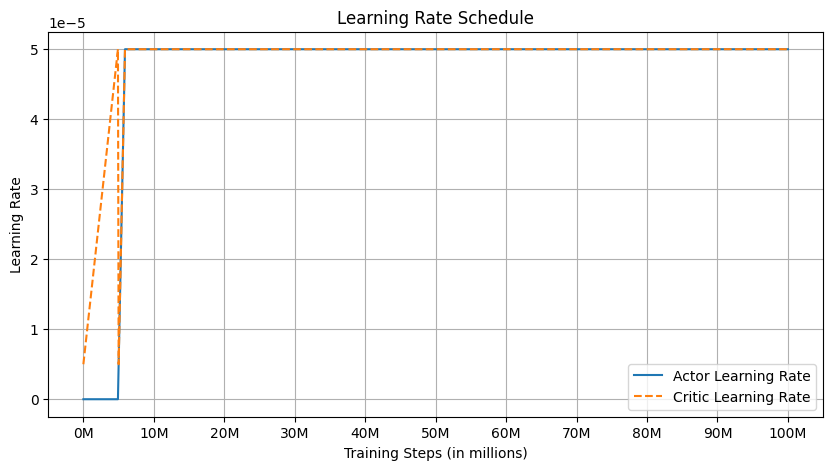

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of steps, reducing the density of points for visualization
steps = np.linspace(0, 100_000_000, num=1000, endpoint=True)

# Initialize learning rates for actor and critic
actor_lr = np.zeros_like(steps)
critic_lr = np.zeros_like(steps)

# Define key transition points
step_5M = np.searchsorted(steps, 5_000_000)
step_6M = np.searchsorted(steps, 6_000_000)

# Set learning rates
# Critic learning rate for first 5M steps, ramped linearly
critic_lr[:step_5M] = np.linspace(5e-6, 5e-5, step_5M)

# Actor learning rate remains at 0.0 up to 5M steps
# Reset both learning rates at 5M steps to start from 5e-6
actor_lr[step_5M:step_6M] = np.linspace(5e-6, 5e-5, step_6M - step_5M)
critic_lr[step_5M:step_6M] = np.linspace(5e-6, 5e-5, step_6M - step_5M)

# From 6M steps onwards, maintain the maximum learning rate achieved
actor_lr[step_6M:] = 5e-5
critic_lr[step_6M:] = 5e-5

# Plot the learning rates
plt.figure(figsize=(10, 5))
plt.plot(steps, actor_lr, label='Actor Learning Rate')
plt.plot(steps, critic_lr, label='Critic Learning Rate', linestyle='--')
plt.xlabel('Training Steps (in millions)')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.legend()

# Set x-axis to display in millions
plt.xticks(np.linspace(0, 100_000_000, 11), [f"{x}M" for x in range(0, 101, 10)])
# plt.xscale('log')  # Logarithmic scale for better visualization
plt.grid(True)
plt.show()


In [3]:
from sogym.expert_generation import check_duplicates, copy_unique_files
# Specify the folder path containing the .json files
folder_path = '/home/thomas/Documents/scratch_thomas/GitHub/sogym_v2/dataset/topologies/mmc'

# Adjust the percentage as needed, e.g., 50 for 50%
check_duplicates(folder_path, percentage=100)




Processing files: 100%|██████████| 40602/40602 [07:01<00:00, 96.35it/s] 


Duplicates found. Check 'duplicate.txt' for the list of duplicate files.
Unique files listed in 'unique_files.txt'.


In [4]:
# Specify the path to the unique_files.txt file
unique_files_file = 'unique_files.txt'
# Specify the destination folder for the unique files
destination_folder = '/home/thomas/Documents/scratch_thomas/GitHub/sogym_v2/dataset/topologies/unique_mmc'

# Copy the unique files to the destination folder
copy_unique_files(unique_files_file, destination_folder)


Unique files copied to '/home/thomas/Documents/scratch_thomas/GitHub/sogym_v2/dataset/topologies/unique_mmc'.
